In [2]:
from qite_helpers import *
from ideal_qite import qite
from hamiltonians import short_range_heisenberg, long_range_heisenberg, print_hamiltonian

In [3]:
nbits = 4
J = [1,0,0]
B=0
sr = short_range_heisenberg(nbits, J,B)
lr = long_range_heisenberg(nbits, J)

In [4]:
from ideal_qite import qite
from qiskit.quantum_info import Statevector
db = 0.1
delta = 0.1
N = 30
# nbits = 4
D = 2
init_sv = Statevector.from_label('01'*(nbits//2))

params = qite_params()
params.initialize(sr, nbits, D)
params.set_run_params(db, delta, N, 0, None, init_sv, None)

E,times,states,alist = qite(params, True)

Starting Ideal QITE Simulation:
Iteration 1: ...Done -- Execution Time = 1.52 seconds
Iteration 2: ...Done -- Execution Time = 1.89 seconds
Iteration 3: ...Done -- Execution Time = 2.33 seconds
Iteration 4: ...Done -- Execution Time = 2.81 seconds
Iteration 5: ...Done -- Execution Time = 3.16 seconds
Iteration 6: ...Done -- Execution Time = 3.51 seconds
Iteration 7: ...Done -- Execution Time = 4.25 seconds
Iteration 8: ...Done -- Execution Time = 4.71 seconds
Iteration 9: ...Done -- Execution Time = 4.83 seconds
Iteration 10: ...Done -- Execution Time = 5.24 seconds
Iteration 11: ...Done -- Execution Time = 5.86 seconds
Iteration 12: ...Done -- Execution Time = 6.21 seconds
Iteration 13: ...Done -- Execution Time = 6.72 seconds
Iteration 14: ...Done -- Execution Time = 8.25 seconds
Iteration 15: ...Done -- Execution Time = 7.78 seconds
Iteration 16: ...Done -- Execution Time = 7.71 seconds
Iteration 17: ...Done -- Execution Time = 8.11 seconds
Iteration 18: ...Done -- Execution Time = 

In [5]:
%matplotlib inline

In [6]:
h_name = 'Short Range Heisenberg - {} qubits'.format(nbits)
h_params = 'J=[{:0.2f},{:0.2f},{:0.2f}], B={}'.format(J[0],J[1],J[2],B)
param_path = '{}/{}/D={}/N={}/db={}/delta={}/'.format(h_name, h_params,D,N,db,delta)
log_path = './qite_logs/ideal_qite/' + param_path
fig_path = './figs/ideal_qite/' + param_path
run_id = 'run'
params.set_identifiers(log_path,fig_path,run_id)

C:\Users\swaga\miniconda3\envs\qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

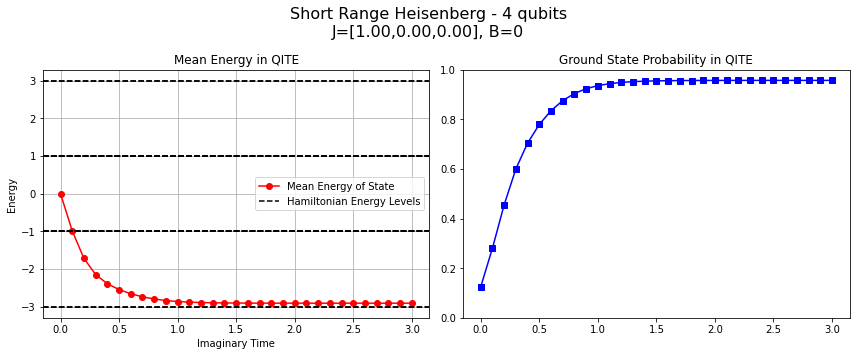

In [13]:
plot_data('{}\n{}'.format(h_name,h_params), '001', params, E, states, eig_flag=True, prob_flag=True)

In [10]:
def my_plot_data(fig_title, run_id, params, E, statevectors, eig_flag, prob_flag):
    plt.clf()

    if prob_flag:
        fig,axs = plt.subplots(1,2, figsize=(12,5), sharex=True)
        energy_plot = axs[0]
        prob_plot = axs[1]

        energy_plot.set_title('Mean Energy in QITE')
        prob_plot.set_title('Ground State Probability in QITE')
    else:
        fig,axs = plt.subplots(1,1,figsize=(6,5))
        energy_plot = axs
    
    fig.suptitle(fig_title, fontsize=16)
    plt.subplots_adjust(top=0.85)
    
    energy_plot.plot(np.arange(params.N+1)*params.db, E, 'ro-', label='Mean Energy of State')
    if eig_flag:
        w,v = hamiltonians.get_spectrum(params.hm_list, params.nbits)
        for eig in w:
            eig_line = energy_plot.axhline(y=eig.real, color='k', linestyle='--')
        eig_line.set_label('Hamiltonian Energy Levels')
    
    energy_plot.set_xlabel('Imaginary Time')
    energy_plot.set_ylabel('Energy')
    energy_plot.grid()
    energy_plot.legend(loc='best')

    if prob_flag:
        if not eig_flag:
            w,v = hamiltonians.get_spectrum(params.hm_list, params.nbits)
        w_sort_i = np.argsort(w)

        gs_probs = np.zeros(params.N+1, dtype=float)

        for k in range(len(w)):
            i = w_sort_i[k]
            if k == 0:
                prev_i = i
            else:
                prev_i = w_sort_i[k-1]
            # stop looping if the energy increases from the ground state
            if w[i] > w[prev_i]:
                break
            
            vec = v[:,i]
            for j in range(params.N+1):
                gs_probs[j] += np.abs( np.vdot(vec, statevectors[j]) )**2
        prob_plot.plot(np.arange(params.N+1)*params.db, gs_probs, 'bs-')
        prob_plot.set_ylim([0.0, 1.0])
        prob_plot.grid()

    fig.tight_layout()

    plt.savefig(params.fig_path+params.id+run_id+'.png')

<Figure size 432x288 with 0 Axes>

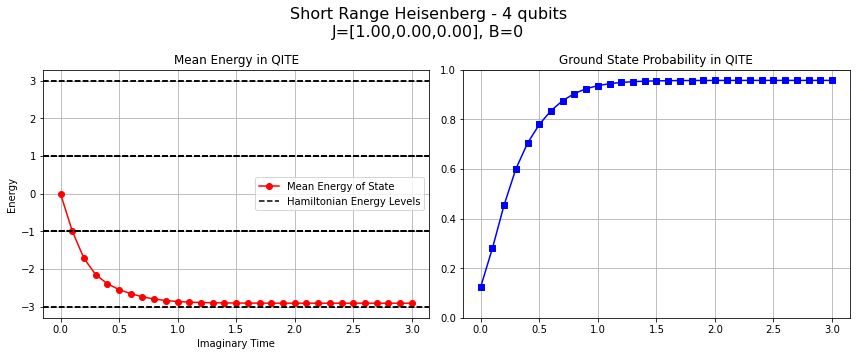

In [12]:
my_plot_data('{}\n{}'.format(h_name,h_params), '001', params, E, states, eig_flag=True, prob_flag=True)